# Dropout

Machine learning is ultimately used to predict outcomes given a set of features. Therefore, anything we can do to generalize the performance of our model is seen as a net gain. Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase. If you take a look at the Keras documentation for the dropout layer, you’ll see a link to a white paper written by Geoffrey Hinton and friends, which goes into the theory behind dropout.

https://drive.google.com/viewerng/viewer?url=http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import normalize, to_categorical

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

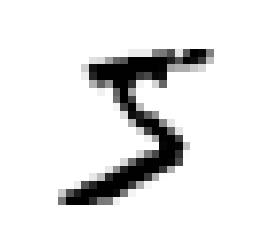

In [4]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

There is a little preprocessing that we must perform beforehand. We normalize the pixels (features) such that they range from 0 to 1. This will enable the model to converge towards a solution that much faster. Next, we transform each of the target labels for a given sample into an array of 1s and 0s where the index of the number 1 indicates the digit the the image represents. We do this because otherwise our model would interpret the digit 9 as having a higher priority than the number 3.

In [5]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Before feeding a 2 dimensional matrix into a neural network, we use a flatten layer which transforms it into a 1 dimensional array by appending each subsequent row to the one that preceded it. We’re going to be using two hidden layers consisting of 128 neurons each and an output layer consisting of 10 neurons, each for one of the 10 possible digits. The softmax activation function will return the probability that a sample represents a given digit.

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

We set 10% of the data aside for validation. We will use this to compare the tendency of a model to overfit with and without dropout. A batch size of 32 implies that we will compute the gradient and take a step in the direction of the gradient with a magnitude equal to the learning rate, after having pass 32 samples through the neural network. We do this a total of 10 times as specified by the number of epochs.

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 187us/step - loss: 0.2746 - acc: 0.9208 - val_loss: 0.1231 - val_acc: 0.9637
Epoch 2/10
54000/54000 [==============================] - 7s 129us/step - loss: 0.1141 - acc: 0.9649 - val_loss: 0.0937 - val_acc: 0.9708
Epoch 3/10
54000/54000 [==============================] - 7s 130us/step - loss: 0.0760 - acc: 0.9756 - val_loss: 0.0865 - val_acc: 0.9733
Epoch 4/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.0570 - acc: 0.9818 - val_loss: 0.0921 - val_acc: 0.9730
Epoch 5/10
54000/54000 [==============================] - 7s 126us/step - loss: 0.0441 - acc: 0.9858 - val_loss: 0.0876 - val_acc: 0.9753
Epoch 6/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.0330 - acc: 0.9886 - val_loss: 0.0941 - val_acc: 0.9742
Epoch 7/10
54000/54000 [==============================] - 7s 129us/step - loss: 0.0281 - acc: 0.9901 - val_loss: 0.0965 - 

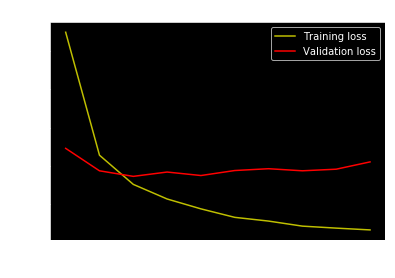

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

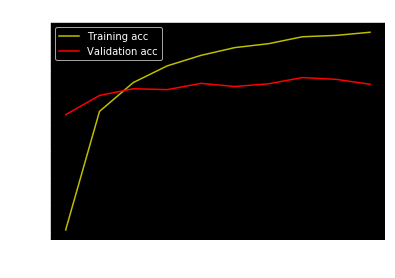

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 1s 58us/step


0.9729

## Dropout

There’s some debate as to whether the dropout should be placed before or after the activation function. As a rule of thumb, place the dropout after the activate function for all activation functions other than relu. In passing 0.5, every hidden unit (neuron) is set to 0 with a probability of 0.5. In other words, there’s a 50% change that the output of a given neuron will be forced to 0.

In [12]:
model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28)))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))

model_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
__________

In [13]:
model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 166us/step - loss: 0.5495 - acc: 0.8309 - val_loss: 0.1627 - val_acc: 0.9540
Epoch 2/10
54000/54000 [==============================] - 7s 139us/step - loss: 0.2922 - acc: 0.9153 - val_loss: 0.1247 - val_acc: 0.9642
Epoch 3/10
54000/54000 [==============================] - 8s 140us/step - loss: 0.2396 - acc: 0.9292 - val_loss: 0.1052 - val_acc: 0.9678
Epoch 4/10
54000/54000 [==============================] - 8s 143us/step - loss: 0.2136 - acc: 0.9375 - val_loss: 0.0967 - val_acc: 0.9720
Epoch 5/10
54000/54000 [==============================] - 7s 136us/step - loss: 0.1959 - acc: 0.9413 - val_loss: 0.0838 - val_acc: 0.9760
Epoch 6/10
54000/54000 [==============================] - 8s 143us/step - loss: 0.1834 - acc: 0.9460 - val_loss: 0.0880 - val_acc: 0.9727
Epoch 7/10
54000/54000 [==============================] - 8s 141us/step - loss: 0.1691 - acc: 0.9496 - val_loss: 0.0848 - v

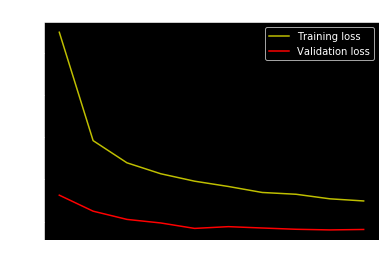

In [15]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

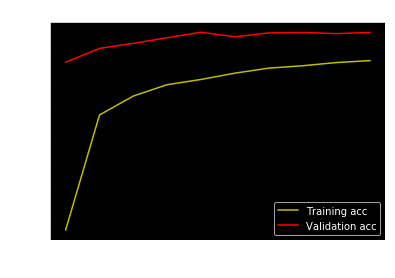

In [16]:
acc = history_dropout.history['acc']
val_acc = history_dropout.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 1s 60us/step


0.9703

## Final Thoughts

Dropout can help a model generalize by randomly setting the output for a given neuron to 0. In setting the output to 0, the cost function becomes more sensitive to neighbouring neurons changing the way the weights will be updated during the process of backpropagation.